## Question 1 (10 points)

Make a new `jupyter notebook` called `lab7_submission.ipynb` and complete the following tasks:


* Download daily values (i.e. `service='dv'`) for another station and time period of your choosing.



* Plot one column



* In a **markdown** cell below, describe what your plot shows



A map of station ID numbers can be found here: https://maps.waterdata.usgs.gov/mapper/index.html

A table of the parameter codes can be found here: https://help.waterdata.usgs.gov/parameter_cd?group_cd=PHY

In [1]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '06043500'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2000-01-01', end='2021-01-01')
df

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd,00060_Mean,00060_Mean_cd
datetime,,,,,,,,,
2000-01-01 00:00:00+00:00,NaN,NaN,06043500,NaN,NaN,NaN,NaN,358.0,A
2000-01-02 00:00:00+00:00,NaN,NaN,06043500,NaN,NaN,NaN,NaN,360.0,A
2000-01-03 00:00:00+00:00,NaN,NaN,06043500,NaN,NaN,NaN,NaN,346.0,A
2000-01-04 00:00:00+00:00,NaN,NaN,06043500,NaN,NaN,NaN,NaN,340.0,A
2000-01-05 00:00:00+00:00,NaN,NaN,06043500,NaN,NaN,NaN,NaN,343.0,A
...,...,...,...,...,...,...,...,...,...
2020-12-28 00:00:00+00:00,NaN,NaN,06043500,NaN,NaN,NaN,NaN,270.0,A
2020-12-29 00:00:00+00:00,NaN,NaN,06043500,NaN,NaN,NaN,NaN,259.0,A
2020-12-30 00:00:00+00:00,NaN,NaN,06043500,NaN,NaN,NaN,NaN,262.0,A


<AxesSubplot:xlabel='datetime'>

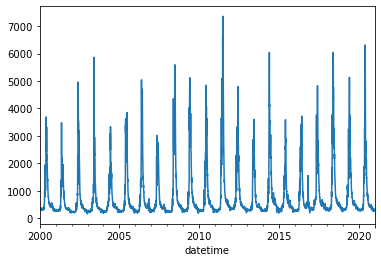

In [2]:
# Simple plot
df['00060_Mean'].plot()

I chose to look at the Gallatin river outside of Bozeman, Montana. I chose this river because it is undamamed and free flowing and has great fluctuation throughout the year, so I wanted to briefly glance if there are any rough patterns that appear over the last 20 years. It would be interesting to compare these with snowfall, soil moisture, and some other factors for the rivers in the Catchment. 

---------------
## Question 2 (10 points)
​
* Make an HTML table that contains the **site name**, **site number** and **mean daily discharge** between Oct 31, 2020 and Sep 30, 2021 (zero decimal places)** for **three** rivers in the US.
​
HINT: the discharge parameter is `00060_Mean`. If the data from your site does not contain this column, try another site.
​
--------------

In [3]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

In [4]:
# Get instantaneous values (iv)
willamette_harrisburg = nwis.get_record(sites='14166000', service='dv', start='2020-10-31', end='2021-09-30')
int(willamette_harrisburg['00060_Mean'].mean())

8623

In [5]:
# Get instantaneous values (iv)
santiam_mehama = nwis.get_record(sites='14183000', service='dv', start='2020-10-31', end='2021-09-30')
int(santiam_mehama['00060_Mean'].mean())

3325

In [6]:
# Get instantaneous values (iv)
mckenzie_vida = nwis.get_record(sites='14162500', service='dv', start='2020-10-31', end='2021-09-30')
int(mckenzie_vida['00060_Mean'].mean())

3666

<table>
  <tr>
    <th>Site Name</th>
    <th>Site Number</th>
    <th>Mean Daily Discharge</th>
  </tr>
  <tr>
    <td>Willamette @ Harrisburg</td>
    <td>14166000</td>
    <td>8623</td>
  </tr>
  <tr>
    <td>Santiam @ Mehama</td>
    <td>14183000</td>
    <td>3325</td>
  </tr>
    <tr>
    <td>Mckenzie @ Vida</td>
    <td>14162500</td>
    <td>3666</td>
  </tr>
</table>

In [7]:
# Import packages
import numpy as np
import pandas as pd
import folium

In [8]:
# Read HTML table data
mountains = pd.read_html('https://en.wikipedia.org/wiki/List_of_mountain_peaks_of_Oregon')
mountains

[                                                   0
 0  Map this section's coordinates using: OpenStre...
 1                       Download coordinates as: KML,
     Rank                           Mountain peak        Mountain range  \
 0      1               Mount Hood[6][7][8][9][a]         Cascade Range   
 1      2      Mount Jefferson[10][11][12][13][b]         Cascade Range   
 2      3            South Sister[14][15][16][17]         Cascade Range   
 3      4         North Sister[18][19][20][21][c]         Cascade Range   
 4      5        Middle Sister[22][23][24][25][d]         Cascade Range   
 5      6        Sacajawea Peak[26][27][28][e][f]     Wallowa Mountains   
 6      7          Steens Mountain[29][30][31][g]       Steens Mountain   
 7      8        Aneroid Mountain[32][33][34][35]     Wallowa Mountains   
 8      9               Twin Peaks[36][37][38][h]     Wallowa Mountains   
 9     10            Red Mountain[39][40][41][42]     Wallowa Mountains   
 10    11  M

In [9]:
# We would like the table that contains the highest summits of Oregon which happens to be the second one
mountain_stats = mountains[1]

In [10]:
# Some wrangling
mountain_stats['Location'] = mountain_stats['Location'].str.replace(mountain_stats['Location'].loc[0], "45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W", regex=True)

In [11]:
mountain_stats

,Rank,Mountain peak,Mountain range,Elevation,Prominence,Isolation,Location
0,1,Mount Hood[6][7][8][9][a],Cascade Range,3428.8 m,2349 m,92.2 km,45°22′25″N 121°41′45″W﻿ / ﻿45.3735°N 121.6959°W
1,2,Mount Jefferson[10][11][12][13][b],Cascade Range,3201 m,1767 m,77.5 km,44°40′27″N 121°47′59″W﻿ / ﻿44.6743°N 121.7996°W
2,3,South Sister[14][15][16][17],Cascade Range,3158.5 m,1705 m,63.4 km,44°06′13″N 121°46′09″W﻿ / ﻿44.1035°N 121.7693°W
3,4,North Sister[18][19][20][21][c],Cascade Range,3075 m,837 m,7 km,44°10′00″N 121°46′20″W﻿ / ﻿44.1666°N 121.7723°W
4,5,Middle Sister[22][23][24][25][d],Cascade Range,3064 m,382 m,1.8 km,44°08′54″N 121°47′02″W﻿ / ﻿44.1483°N 121.7840°W
5,6,Sacajawea Peak[26][27][28][e][f],Wallowa Mountains,3000 m,1949 m,202 km,45°14′42″N 117°17′34″W﻿ / ﻿45.2450°N 117.2929°W
6,7,Steens Mountain[29][30][31][g],Steens Mountain,2968 m,1336 m,201 km,42°38′11″N 118°34′36″W﻿ / ﻿42.6364°N 118.5767°W
7,8,Aneroid Mountain[32][33][34][35],Wallowa Mountains,2958.7 m,647 m,9.48 km,45°12′11″N 117°10′30″W﻿ / ﻿45.2030°N 117.1750°W
8,9,Twin Peaks[36][37][38][h],Wallowa Mountains,2950 m,610 m,7.79 km,45°18′17″N 117°20′43″W﻿ / ﻿45.3046°N 117.3452°W
9,10,Red Mountain[39][40][41][42],Wallowa Mountains,2913.8 m,610 m,11.84 km,45°03′52″N 117°14′46″W﻿ / ﻿45.0644°N 117.2460°W


In [12]:
mountain_stats.dtypes

Rank               int64
Mountain peak     object
Mountain range    object
Elevation         object
Prominence        object
Isolation         object
Location          object
dtype: object

In [13]:
# Have a look at the location object
mountain_stats['Location'].iloc[0]

'45°22′25″N 121°41′45″W\ufeff / \ufeff45.3735°N 121.6959°W'

In [14]:
# The latitude is string position 27 to 34
lat1 = mountain_stats['Location'].iloc[0][27:34]

# The longitude is string position 37 to 45
lon1 = mountain_stats['Location'].iloc[0][37:45]

In [15]:
# Convert to float and multiple by -1
float(mountain_stats['Location'].iloc[0][37:45]) * -1

-121.6959

In [16]:
# To get these data from every row, we can write a quick for loop
coords = []
for i in range(len(mountain_stats)):
    lat = float(mountain_stats['Location'].iloc[i][27:34])
    lon = float(mountain_stats['Location'].iloc[i][37:45]) * -1
    coords.append((lat, lon))
coords

[(45.3735, -121.6959),
 (44.6743, -121.7996),
 (44.1035, -121.7693),
 (44.1666, -121.7723),
 (44.1483, -121.784),
 (45.245, -117.2929),
 (42.6364, -118.5767),
 (45.203, -117.175),
 (45.3046, -117.3452),
 (45.0644, -117.246),
 (42.4445, -122.3156),
 (45.2223, -117.3968),
 (43.1528, -122.0665),
 (44.083, -121.6994),
 (44.8168, -118.1039),
 (43.9794, -121.6885),
 (44.3123, -118.7166),
 (42.9229, -122.0162),
 (43.5207, -122.1496),
 (42.0995, -118.6506),
 (42.0628, -120.2408),
 (42.3001, -120.1238),
 (43.1551, -122.22),
 (42.496, -120.8773),
 (42.3155, -122.0876),
 (42.9306, -121.3607),
 (44.7138, -118.5617),
 (42.5134, -122.1453),
 (44.2889, -118.4954),
 (42.4597, -119.7414),
 (43.6892, -121.2549)]

In [17]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i]).add_to(map)
map

In [18]:
# Get elevation value as a float
float(mountain_stats['Elevation'].iloc[0][:-2])

3428.8

In [19]:
# To get these data from every row, we can write another quick for loop
elevation = []
for i in range(len(mountain_stats)):
    elev = float(mountain_stats['Elevation'].iloc[i][:-2])
    elevation.append(elev)
elevation

[3428.8,
 3201.0,
 3158.5,
 3075.0,
 3064.0,
 3000.0,
 2968.0,
 2958.7,
 2950.0,
 2913.8,
 2895.0,
 2816.0,
 2799.4,
 2798.0,
 2777.0,
 2764.0,
 2756.1,
 2722.9,
 2666.4,
 2633.3,
 2575.8,
 2564.0,
 2553.3,
 2550.6,
 2503.83,
 2499.3,
 2482.0,
 2449.8,
 2450.0,
 2445.8,
 2435.0]

In [20]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=elevation[i]).add_to(map)
map

---------------
## Question 3 (10 points)

* Make a new map of the tallest mountains in Oregon but include a popup that displays the `Isolation` data as a **float**.


In [21]:
# To get these data from every row, we can write another quick for loop
isolation = []
for i in range(len(mountain_stats)):
    iso = float(mountain_stats['Isolation'].iloc[i][:-2])
    isolation.append(iso)
isolation

[92.2,
 77.5,
 63.4,
 7.0,
 1.8,
 202.0,
 201.0,
 9.48,
 7.79,
 11.84,
 111.8,
 5.32,
 81.1,
 5.52,
 69.9,
 11.02,
 74.2,
 25.9,
 41.4,
 45.5,
 71.4,
 28.1,
 12.49,
 65.7,
 23.7,
 53.1,
 23.5,
 15.98,
 10.73,
 35.6,
 46.5]

In [22]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=isolation[i]).add_to(map)
map

--------------

## Extra credit/grad students 

* Add a popup that includes the name of the mountain as a `string` (without any square brackets).  

--------------

In [23]:
# To get these data from every row, we can write another quick for loop
#can remove figures
import re


names = []
for i in range(len(mountain_stats)):
    name = mountain_stats['Mountain peak'].iloc[i]
    name = re.sub("[\(\[].*?[\)\]]","",name)
    names.append(name)
names

['Mount Hood',
 'Mount Jefferson',
 'South Sister',
 'North Sister',
 'Middle Sister',
 'Sacajawea Peak',
 'Steens Mountain',
 'Aneroid Mountain',
 'Twin Peaks',
 'Red Mountain',
 'Mount McLoughlin',
 'Elkhorn Peak',
 'Mount Thielsen',
 'Broken Top',
 'Rock Creek Butte',
 'Mount Bachelor',
 'Strawberry Mountain',
 'Mount Scott',
 'Diamond Peak',
 'Pueblo Mountain',
 'Crane Mountain',
 'Drake Peak',
 'Mount Bailey',
 'Gearhart Mountain',
 'Aspen Butte',
 'Yamsay Mountain',
 'Vinegar Hill',
 'Pelican Butte',
 'Lookout Mountain',
 'Warner Peak',
 'Paulina Peak']

In [24]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(coords)):
    folium.Marker(coords[i], popup=names[i]).add_to(map)
map

# Part 2 - Web Scraping

In [25]:
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

In [26]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

In [27]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://en.wikipedia.org/wiki/Category:Ski_areas_and_resorts_in_Oregon")



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ivanduse/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


In [28]:
# Retrieve ski resort names
html_list = driver.find_element(By.ID, "mw-pages")
items = html_list.find_elements(By.TAG_NAME, "li")

In [29]:
ski_resort_names = []
for item in items:
    text = item.text
    print(text)
    ski_resort_names.append(text)
driver.close()

Anthony Lakes (ski area)
Mount Ashland Ski Area
Cooper Spur ski area
Ferguson Ridge Ski Area
Hoodoo (ski area)
Mount Ashland Ski Area Expansion
Mount Bachelor ski area
Mount Hood Meadows
Mount Hood Skibowl
Snow Bunny
Spout Springs Ski Area
Summit Pass (Oregon)
Timberline Lodge ski area
Warner Canyon
Willamette Pass Resort


### GEOCODING

In [30]:
# Define test URL
url = 'https://www.google.com/maps/place/Hoodoo+Ski+Area+Oregon/'

# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open URL
driver.get(url)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ivanduse/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


In [31]:
# Click search
element = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
element.click()

In [32]:
# Retrieve the URL
link = driver.current_url

# We can find the first occurrence of a character by using the "find" method
link.find('@')

-1

In [33]:
lat, lon

(43.6892, -121.2549)

In [34]:
driver.close()

In [35]:
ski_resort_coords = []
# Loop through every ski resort to find it's coordinates
for resort in ski_resort_names:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + resort + ' Oregon/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    ski_resort_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ivanduse/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ivanduse/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ivanduse/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ivanduse/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome 

In [36]:
ski_resort_coords

[('44.9629273', '-118.2357129'),
 ('42.081689', '-122.7069427'),
 ('45.4188609', '-121.6064525'),
 ('45.2816889', '-117.1148305'),
 ('44.4086477', '-121.8736045'),
 ('42.081689', '-122.7069427'),
 ('44.0028975', '-121.6812601'),
 ('45.331759', '-121.6673735'),
 ('45.2943644', '-121.789626'),
 ('45.2871456', '-121.7312302'),
 ('45.7552462', '-118.0536097'),
 ('44.0304813', '-123.488289'),
 ('45.3311319', '-121.7131951'),
 ('42.237378', '-120.2968271'),
 ('43.6000579', '-122.0387287')]

In [37]:
map = folium.Map(location=[44, -121], zoom_start=7)
for i in range(0, len(ski_resort_coords)):
    folium.Marker(ski_resort_coords[i], popup=ski_resort_names[i]).add_to(map)
map

---------------
## Question 4 (10 points)

* Write a script to automatically derive the geographic coordinates for the following addresses:

    * 1844 SW Morrison St, Portland, OR 97205
    
    * 800 Occidental Ave S, Seattle, WA 98134
    
    * 1001 Stadium Dr, Inglewood, CA 90301
    
    * 2700 Martin Luther King Jr Blvd, Eugene, OR 97401
    

You can **either** find each one individually **or** make a list of the addresses and use a for loop. 


* Plot the coordinates of these addresses on an interactive map using `folium` 



--------------


In [38]:
stadium_names = ['1844 SW Morrison St, Portland, OR 97205',
                 '800 Occidental Ave S, Seattle, WA 98134',
                 '1001 Stadium Dr, Inglewood, CA 90301',
                 '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

In [39]:
print(stadium_names[1])

800 Occidental Ave S, Seattle, WA 98134


In [40]:
stadium_names

['1844 SW Morrison St, Portland, OR 97205',
 '800 Occidental Ave S, Seattle, WA 98134',
 '1001 Stadium Dr, Inglewood, CA 90301',
 '2700 Martin Luther King Jr Blvd, Eugene, OR 97401']

In [41]:
stadium_coords = []
# Loop through every ski resort to find it's coordinates
for stadium in stadium_names:
       
    # Define URL to search in Google Maps and add 'Oregon' in for good measure
    url = 'https://www.google.com/maps/place/' + stadium + '/'
    
    # Import web driver and search for ski resorts
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(url)
      
    # Click search
    element = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton")))
    element.click()
    
    # Make the web driver wait until the URL updates (i.e. contains the @ sign we're looking for)
    WebDriverWait(driver, 20).until(EC.url_contains("@"))
    
    # Retrieve the URL
    link = driver.current_url
    
    # Split string
    lat, lon = link.rsplit('@', 1)[1].rsplit(',', 1)[0].rsplit(',', 1)
    
    # Append to list
    stadium_coords.append((lat, lon))
    
    # Close driver
    driver.close()



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ivanduse/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ivanduse/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ivanduse/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Driver [/Users/ivanduse/.wdm/drivers/chromedriver/mac64/98.0.4758.102/chromedriver] found in cache


In [42]:
stadium_coords

[('45.5216813', '-122.693017'),
 ('47.5933137', '-122.3344609'),
 ('33.9530093', '-118.3407129'),
 ('44.0594325', '-123.0710918')]

In [43]:
map = folium.Map(location=[35, -121], zoom_start=4)
for i in range(0, len(stadium_coords)):
    folium.Marker(stadium_coords[i], popup=stadium_names[i]).add_to(map)
map

## Which ski resorts received the most snowfall?


In [44]:
# Import package
import xarray as xr

# Define filepath
fp = '/Users/ivanduse/Desktop/School/590/lab7/era_monthly_snowfall_2020.nc'

# Read data
xds = xr.open_dataset(fp, decode_coords='all')

In [45]:
xds

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 25, time: 12)
Coordinates:
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2020-12-01
Data variables:
    sf         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-30 21:04:05 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

---------------
## Question 5 (10 points)

* Which ski resort received **more** snowfall in 2020, Willammette Pass or Hoodoo? 


In [46]:
willammette_pass = xds.sel(latitude=43.6000579, longitude=-122.0387233, method='nearest')

In [47]:
hoodoo = xds.sel(latitude=44.4086477, longitude=-121.8735991, method='nearest')

In [48]:
willp_snow = willammette_pass['sf'].values.sum()*100
print(willp_snow,'m of snow')

1.9636936485767365 m of snow


In [49]:
hoodoo_snow = hoodoo['sf'].values.sum()*100
print(hoodoo_snow,'m of snow')

1.859692856669426 m of snow


Willamette Pass suprisingly recieved more snow than Hoodoo!

## Extra credit/grad students

Download `era_monthly_snowfall_1979_2020.nc` from the lab7 folder on Dropbox. 

* Rank the ski resorts by:

    * Average snowfall in **November**
    
    * Average snowfall in **Spring** (i.e. March, April, and May)
    
    * **Interannual variability** in snowfall 

In [50]:
import pandas as pd

In [51]:
# Define filepath
mfp = '/Users/ivanduse/Desktop/School/590/lab7/era_monthly_snowfall_1979_2020.nc'

# Read data
mxds = xr.open_dataset(mfp, decode_coords='all')

In [52]:
ski_name_loc = []

for i in range(len(ski_resort_names)):
    name = ski_resort_names[i]
    lat, lon = ski_resort_coords[i]
    ski_name_loc.append((name, (lat, lon)))

ski_name_loc

[('Anthony Lakes (ski area)', ('44.9629273', '-118.2357129')),
 ('Mount Ashland Ski Area', ('42.081689', '-122.7069427')),
 ('Cooper Spur ski area', ('45.4188609', '-121.6064525')),
 ('Ferguson Ridge Ski Area', ('45.2816889', '-117.1148305')),
 ('Hoodoo (ski area)', ('44.4086477', '-121.8736045')),
 ('Mount Ashland Ski Area Expansion', ('42.081689', '-122.7069427')),
 ('Mount Bachelor ski area', ('44.0028975', '-121.6812601')),
 ('Mount Hood Meadows', ('45.331759', '-121.6673735')),
 ('Mount Hood Skibowl', ('45.2943644', '-121.789626')),
 ('Snow Bunny', ('45.2871456', '-121.7312302')),
 ('Spout Springs Ski Area', ('45.7552462', '-118.0536097')),
 ('Summit Pass (Oregon)', ('44.0304813', '-123.488289')),
 ('Timberline Lodge ski area', ('45.3311319', '-121.7131951')),
 ('Warner Canyon', ('42.237378', '-120.2968271')),
 ('Willamette Pass Resort', ('43.6000579', '-122.0387287'))]

In [53]:
month_idxs = mxds.groupby('time.month')

In [54]:
nov_izds = month_idxs[11]
nov_izds["time.month"]

<xarray.DataArray 'month' (time: 42)>
array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11])
Coordinates:
  * time     (time) datetime64[ns] 1979-11-01 1980-11-01 ... 2020-11-01

In [55]:
oregon_snow = pd.DataFrame()
oregon_snow['Ski Resort'] = ski_resort_names
avg_nov_sf = []


for i in range(0, len(ski_name_loc)):
    november_snow = nov_izds['sf'].sel(latitude = ski_name_loc[i][1][0], longitude = ski_name_loc[i][1][1], method = 'nearest').mean().values
    avg_nov_sf.append(november_snow)
    
oregon_snow['November Snowfall Average'] = avg_nov_sf


In [56]:
oregon_snow.sort_values(['November Snowfall Average'], ascending=False)


,Ski Resort,November Snowfall Average
6,Mount Bachelor ski area,0.0032581266
14,Willamette Pass Resort,0.002860935
4,Hoodoo (ski area),0.0025108436
3,Ferguson Ridge Ski Area,0.0022443563
7,Mount Hood Meadows,0.002203377
8,Mount Hood Skibowl,0.002203377
9,Snow Bunny,0.002203377
12,Timberline Lodge ski area,0.002203377
0,Anthony Lakes (ski area),0.0018615923
2,Cooper Spur ski area,0.0016262013


In [57]:
spring_izds = mxds.sel(time = mxds.time.dt.season == "MAM")
spring_izds["time.month"]

<xarray.DataArray 'month' (time: 126)>
array([3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3,
       4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4,
       5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5,
       3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3,
       4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4,
       5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5, 3, 4, 5])
Coordinates:
  * time     (time) datetime64[ns] 1979-03-01 1979-04-01 ... 2020-05-01

In [58]:
avg_spring_sf = []

for i in range(0, len(ski_name_loc)):
    spring_snow = spring_izds['sf'].sel(latitude = ski_name_loc[i][1][0], longitude = ski_name_loc[i][1][1], method = 'nearest').mean().values
    avg_spring_sf.append(spring_snow)
    
oregon_snow['Spring Snowfall Average'] = avg_spring_sf


In [59]:
oregon_snow.sort_values(['Spring Snowfall Average'], ascending=False)


,Ski Resort,November Snowfall Average,Spring Snowfall Average
6,Mount Bachelor ski area,0.0032581266,0.0020057987
14,Willamette Pass Resort,0.002860935,0.0017587584
3,Ferguson Ridge Ski Area,0.0022443563,0.0015363443
4,Hoodoo (ski area),0.0025108436,0.0015250901
7,Mount Hood Meadows,0.002203377,0.001485502
8,Mount Hood Skibowl,0.002203377,0.001485502
9,Snow Bunny,0.002203377,0.001485502
12,Timberline Lodge ski area,0.002203377,0.001485502
0,Anthony Lakes (ski area),0.0018615923,0.0011098591
1,Mount Ashland Ski Area,0.0016191967,0.0010225766


In [60]:
yearly_izds = mxds.resample(time='1Y').mean()
yearly_izds

<xarray.Dataset>
Dimensions:    (time: 42, longitude: 49, latitude: 25)
Coordinates:
  * time       (time) datetime64[ns] 1979-12-31 1980-12-31 ... 2020-12-31
  * longitude  (longitude) float32 -128.0 -127.8 -127.5 ... -116.5 -116.2 -116.0
  * latitude   (latitude) float32 47.0 46.75 46.5 46.25 ... 41.5 41.25 41.0
Data variables:
    sf         (time, latitude, longitude) float32 -9.313e-10 ... 0.0003046

In [61]:
yearly_variability = []

for i in range(0, len(ski_name_loc)):
    year_snow = yearly_izds['sf'].sel(latitude = ski_name_loc[i][1][0], longitude = ski_name_loc[i][1][1], method = 'nearest').std().values
    yearly_variability.append(year_snow)
    
oregon_snow['Yearly Deviation'] = yearly_variability

In [62]:
oregon_snow.sort_values(['Yearly Deviation'], ascending=False)


,Ski Resort,November Snowfall Average,Spring Snowfall Average,Yearly Deviation
6,Mount Bachelor ski area,0.0032581266,0.0020057987,0.00040021454
14,Willamette Pass Resort,0.002860935,0.0017587584,0.00036251967
4,Hoodoo (ski area),0.0025108436,0.0015250901,0.00034544914
7,Mount Hood Meadows,0.002203377,0.001485502,0.00032707243
8,Mount Hood Skibowl,0.002203377,0.001485502,0.00032707243
9,Snow Bunny,0.002203377,0.001485502,0.00032707243
12,Timberline Lodge ski area,0.002203377,0.001485502,0.00032707243
1,Mount Ashland Ski Area,0.0016191967,0.0010225766,0.00031316077
5,Mount Ashland Ski Area Expansion,0.0016191967,0.0010225766,0.00031316077
3,Ferguson Ridge Ski Area,0.0022443563,0.0015363443,0.00026299493
